# Introduction and import main libraries

In [1]:
from wordcloud import WordCloud
from keras.models import Sequential
from keras import layers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk
import string
import seaborn as sns
import re
from nltk.corpus import stopwords
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
import plotly.express as px
from itertools import chain
from collections import Counter

Using TensorFlow backend.


In [2]:
fake=pd.read_csv('C:/Users/dimav/Desktop/pet_proj/News classification/Data/Fake.csv')
real=pd.read_csv('C:/Users/dimav/Desktop/pet_proj/News classification/Data/True.csv')

In [3]:
fake['target']=0
real['target']=1
df=pd.concat([fake,real])
df.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [4]:
df['original'] = df['text'] + ' ' + df['title']
df.head()

,title,text,subject,date,target,original
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,Donald Trump just couldn t wish all Americans ...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,House Intelligence Committee Chairman Devin Nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,"On Friday, it was revealed that former Milwauk..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,"On Christmas day, Donald Trump announced that ..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,Pope Francis used his annual Christmas Day mes...


# Visualization part

Let's look at the distribution of our data, the missing values (there are no missing values), what the news outlets write about (nothing surprising), and the ratio of each subject category.

C:\Users\dimav\.conda\envs\my-rdkit-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

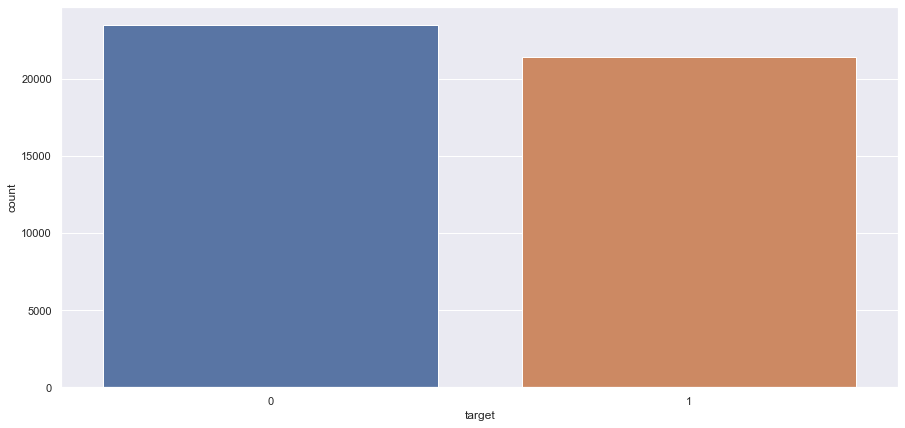

In [5]:
plt.figure(figsize=(15,7))
sns.set(style="darkgrid")
sns.countplot(df['target'])

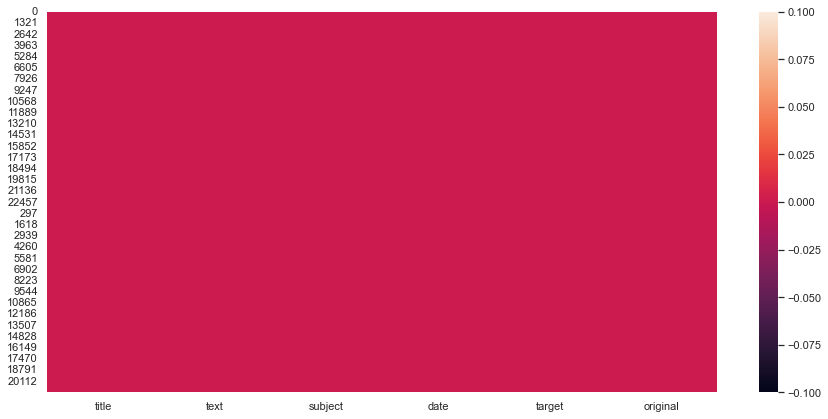

In [6]:
plt.figure(figsize=(15,7))
sns.heatmap(df.isnull());

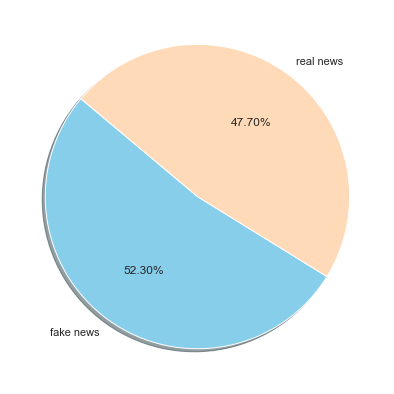

In [7]:
plt.figure(figsize=(15,7))
labels=['fake news','real news']
colors = ["SkyBlue","PeachPuff"]
plt.pie(df['target'].value_counts(),labels=labels,colors=colors,
        autopct='%1.2f%%', shadow=True, startangle=140) 
plt.show()

C:\Users\dimav\.conda\envs\my-rdkit-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='subject', ylabel='count'>

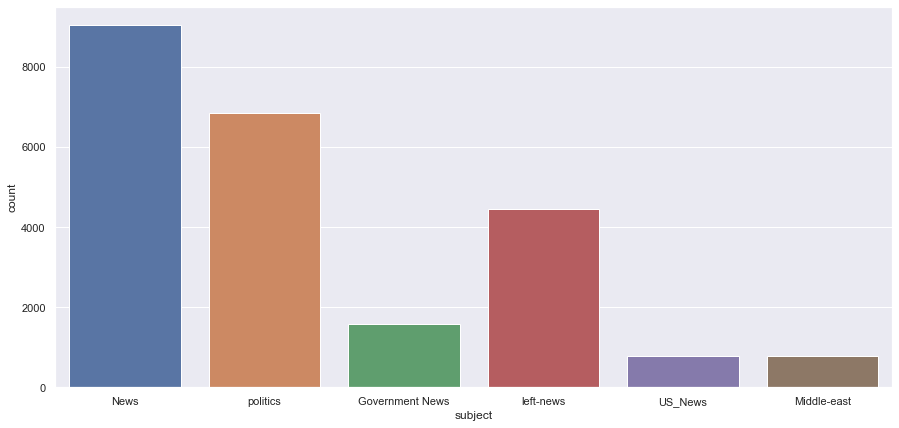

In [8]:
plt.figure(figsize=(15,7))
sns.countplot(fake['subject'])

C:\Users\dimav\.conda\envs\my-rdkit-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


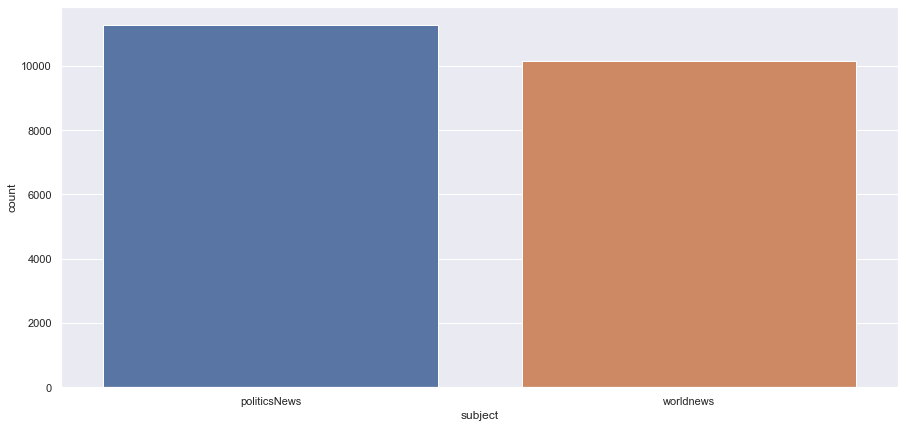

In [9]:
plt.figure(figsize=(15,7))
sns.countplot(real['subject'])
plt.show()

C:\Users\dimav\.conda\envs\my-rdkit-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='subject', ylabel='count'>

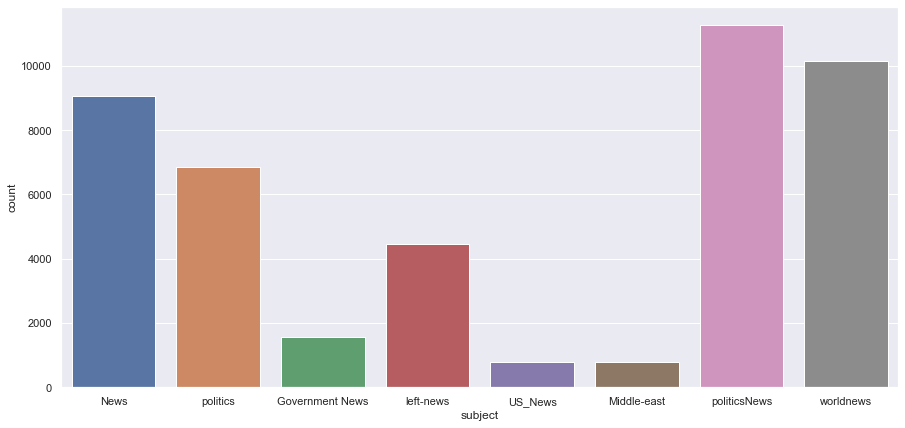

In [10]:
plt.figure(figsize=(15,7))
sns.countplot(df['subject'])

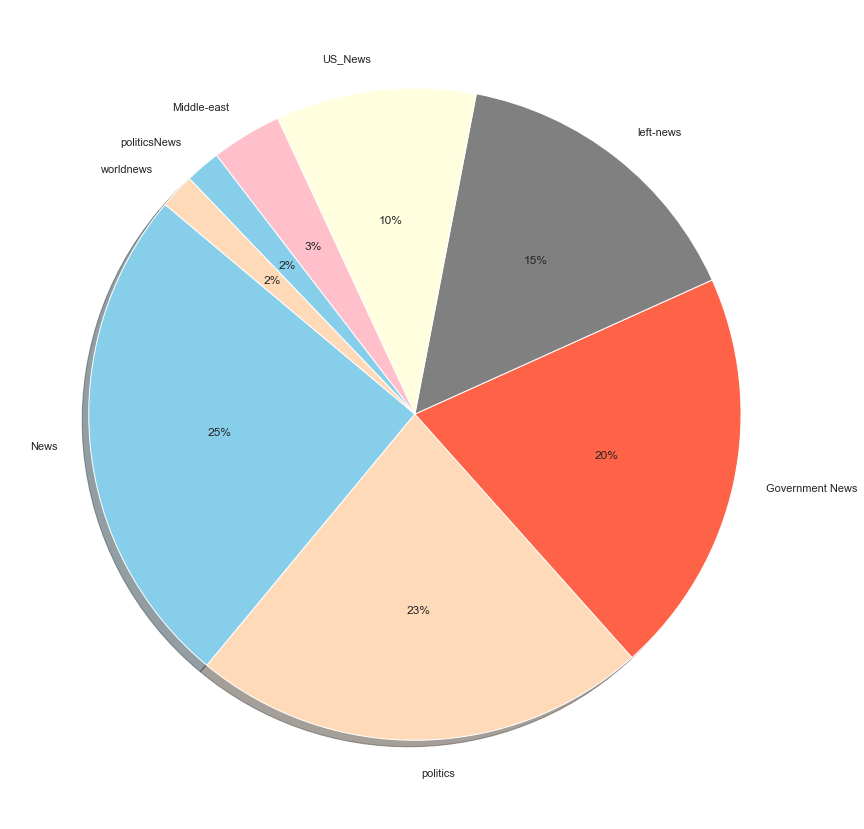

In [11]:
plt.figure(figsize=(15,15))
labels=['News','politics','Government News','left-news','US_News','Middle-east','politicsNews','worldnews']
colors = ["SkyBlue","PeachPuff",'tomato','gray','lightyellow','pink']
plt.pie(df['subject'].value_counts(),labels=labels,colors=colors,
        autopct='%1.f%%', shadow=True, startangle=140) 
plt.show()

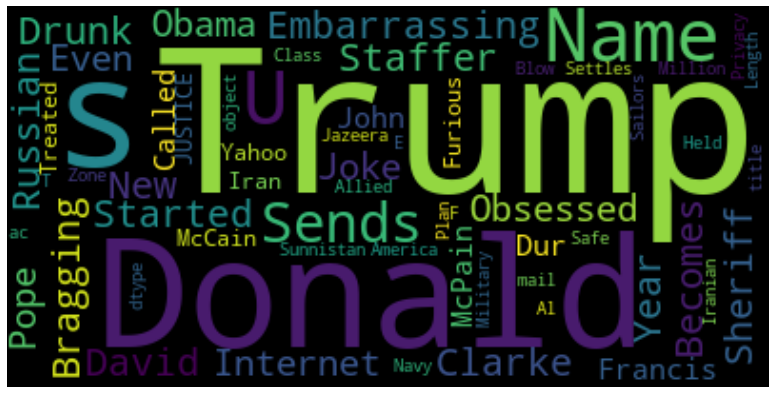

In [12]:
wordcloud = WordCloud(background_color="black").generate(str(fake['title']))
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

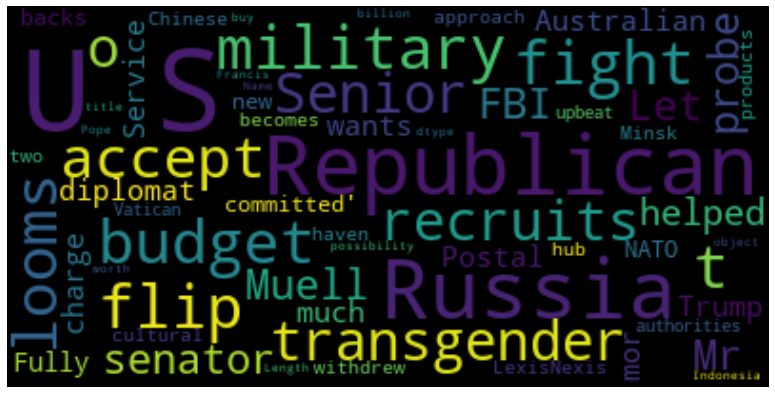

In [13]:
wordcloud = WordCloud(background_color="black").generate(str(real['title']))
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

We will also analyze the time series: mark the date on the X-axis, and group the number of news items published on a particular day on the y-axis. In my opinion, most of the fakes were published during the 2016 election.

In [14]:
real_dinamic=real.groupby(['date'])['target'].count()
real_dinamic=pd.DataFrame(real_dinamic)
fig = px.line(real_dinamic)
fig.show()

In [15]:
fake_dinamic=fake.groupby(['date'])['target'].count()
fake_dinamic=pd.DataFrame(fake_dinamic)
fig = px.line(fake_dinamic)
fig.show()

Text(0, 0.5, 'Distribution of words in the news text')

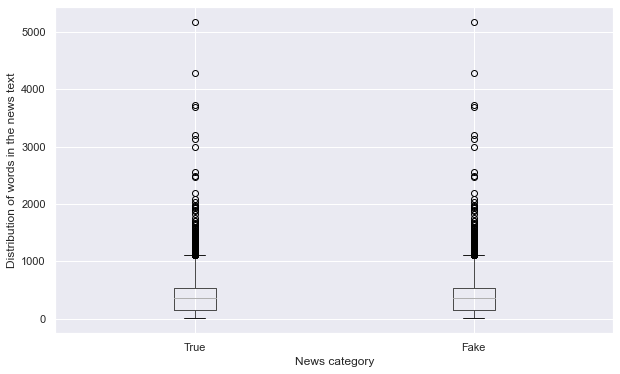

In [16]:
def text_length(text):
    word_count = 0
    for word in text.split(" "):
        word_count += 1
    return word_count

true_words_count = real['text'].apply(text_length)
fake_words_count = fake['text'].apply(text_length)

words_count = pd.DataFrame({'True': true_words_count, 'Fake': true_words_count})

plt.figure(figsize=(10, 6))
words_count.boxplot()
plt.xlabel('News category')
plt.ylabel('Distribution of words in the news text')

# Data preprocessing

On the next step, we need to process the dataset. At this stage, first of all, you need to bring all the characters of the text to lowercase, remove punctuation marks, various non-letter characters and numbers

In [17]:
def data_preprocessing(data):
    ###Here we remove all trash in our text
    prep1 = data.lower()
    prep2 = re.sub('https?://\S+|www\.\S+', '', data)
    prep3 = re.sub('\\W', ' ', data)
    prep4 = re.sub('\n', '', data)
    prep5 = re.sub(' +', ' ', data)
    prep6 = re.sub('^ ', '', data)
    prep7 = re.sub(' $', '', data)
    return data

In [18]:
df['original'].apply(data_preprocessing)

0        Donald Trump just couldn t wish all Americans ...
1        House Intelligence Committee Chairman Devin Nu...
2        On Friday, it was revealed that former Milwauk...
3        On Christmas day, Donald Trump announced that ...
4        Pope Francis used his annual Christmas Day mes...
                               ...                        
21412    BRUSSELS (Reuters) - NATO allies on Tuesday we...
21413    LONDON (Reuters) - LexisNexis, a provider of l...
21414    MINSK (Reuters) - In the shadow of disused Sov...
21415    MOSCOW (Reuters) - Vatican Secretary of State ...
21416    JAKARTA (Reuters) - Indonesia will buy 11 Sukh...
Name: original, Length: 44898, dtype: object

Now I want to tell you about Zipf's law and why we need to remove stop words. Zipf's law is an empirical law of the frequency distribution of natural language words: if all the words of a language are ordered in descending order of their frequency of use, then the frequency of the nth word in such a list will be approximately inversely proportional to its ordinal number n. For example, the second-most-used word is about twice as common as the first, the third — three times less common than the first, and so on.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'the'),
  Text(1, 0, 'to'),
  Text(2, 0, 'of'),
  Text(3, 0, 'and'),
  Text(4, 0, 'a'),
  Text(5, 0, 'in'),
  Text(6, 0, 'that'),
  Text(7, 0, 'on'),
  Text(8, 0, 's'),
  Text(9, 0, 'for'),
  Text(10, 0, 'is'),
  Text(11, 0, 'with'),
  Text(12, 0, 'was'),
  Text(13, 0, 'Trump'),
  Text(14, 0, 'he'),
  Text(15, 0, 'The'),
  Text(16, 0, 'as'),
  Text(17, 0, 'by'),
  Text(18, 0, 'said'),
  Text(19, 0, 'his'),
  Text(20, 0, 'it'),
  Text(21, 0, 'has'),
  Text(22, 0, 'be'),
  Text(23, 0, 'have'),
  Text(24, 0, 'from'),
  Text(25, 0, 'not'),
  Text(26, 0, 'are'),
  Text(27, 0, 'at'),
  Text(28, 0, 'who'),
  Text(29, 0, 'an'),
  Text(30, 0, 'this'),
  Text(31, 0, 'they'),
  Text(32, 0, 'would'),
  Text(33, 0, 'I'),
  Text(34, 0, 'U.S.'),
  Text(35, 0, 'about

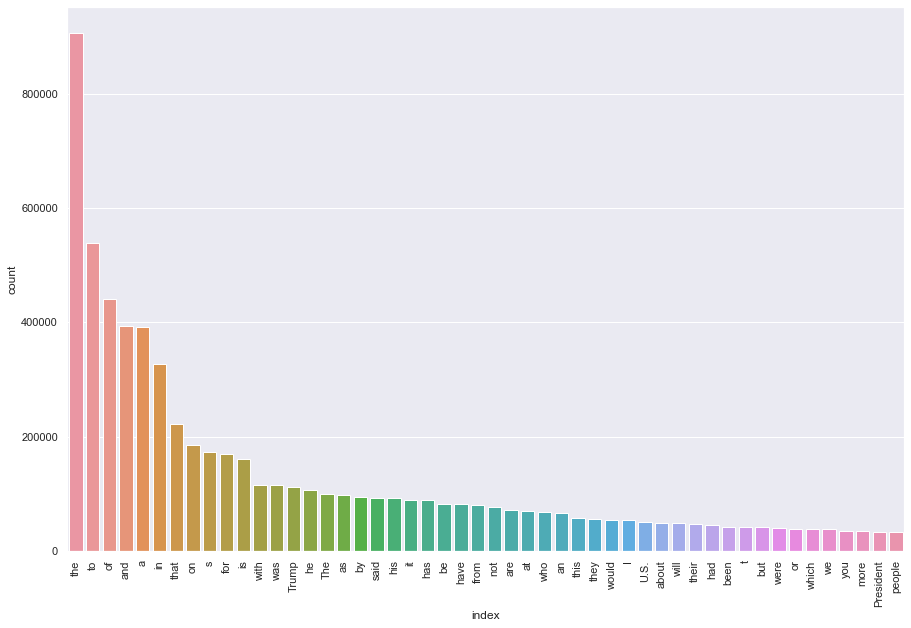

In [19]:
split_words = df['original'].str.split()
list_split_words = list(chain(*split_words))

count_word= Counter(list_split_words)
df_ = pd.DataFrame(data=count_word, index=['count'])
most_frequency_words = df_.T.sort_values(by=['count'], ascending=False).reset_index().head(50)

plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
sns.barplot(x="index", y='count', data=most_frequency_words)
plt.xticks(rotation=90)

In [20]:
import nltk
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [21]:
stop = set(stopwords.words('english'))
def remove_stopwords(data):
    words = [word for word in data if word not in stop]
    words= "".join(words).split()
    words= [words.lower() for words in data.split()]
    return words    

In [22]:
df['original'].apply(remove_stopwords)

0        [donald, trump, just, couldn, t, wish, all, am...
1        [house, intelligence, committee, chairman, dev...
2        [on, friday,, it, was, revealed, that, former,...
3        [on, christmas, day,, donald, trump, announced...
4        [pope, francis, used, his, annual, christmas, ...
                               ...                        
21412    [brussels, (reuters), -, nato, allies, on, tue...
21413    [london, (reuters), -, lexisnexis,, a, provide...
21414    [minsk, (reuters), -, in, the, shadow, of, dis...
21415    [moscow, (reuters), -, vatican, secretary, of,...
21416    [jakarta, (reuters), -, indonesia, will, buy, ...
Name: original, Length: 44898, dtype: object

Usually, texts contain different grammatical forms of the same word or the same root words. Lemmatization is used to reduce the encountered word forms to one (normal form).

Lemmatization is a process that uses morphological analysis and vocabulary to reduce a word to its canonical form-a lemma.

In [23]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatization(text):
    lemmas = []
    for word in text.split():
        lemmas.append(lemmatizer.lemmatize(word))
    return " ".join(lemmas)

In [24]:
df['original'].apply(lemmatization)

0        Donald Trump just couldn t wish all Americans ...
1        House Intelligence Committee Chairman Devin Nu...
2        On Friday, it wa revealed that former Milwauke...
3        On Christmas day, Donald Trump announced that ...
4        Pope Francis used his annual Christmas Day mes...
                               ...                        
21412    BRUSSELS (Reuters) - NATO ally on Tuesday welc...
21413    LONDON (Reuters) - LexisNexis, a provider of l...
21414    MINSK (Reuters) - In the shadow of disused Sov...
21415    MOSCOW (Reuters) - Vatican Secretary of State ...
21416    JAKARTA (Reuters) - Indonesia will buy 11 Sukh...
Name: original, Length: 44898, dtype: object

# Building models 

In fact, building neural networks requires a huge amount of resources and may be unreasonable in various tasks. Before using complex algorithms (such as transformers or other neural networks), it is recommended to build a baseline algorithm

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
X_train, X_test, y_train, y_test = train_test_split(df['original'], df['target'], test_size=0.2)
my_tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = my_tfidf.fit_transform(X_train)
tfidf_test = my_tfidf.transform(X_test)
fake_detector_logistic = LogisticRegression().fit(tfidf_train, y_train)
predictions_log_reg = fake_detector_logistic.predict(tfidf_test)
print (classification_report(y_test, predictions_log_reg))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4666
           1       0.98      0.99      0.98      4314

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [26]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
conf_mat = confusion_matrix(y_test, predictions_log_reg)
    
accscore = accuracy_score(y_test, predictions_log_reg)
f1score = f1_score(y_test,predictions_log_reg)

print('The accuracy of prediction is {:.2f}%.\n'.format(accscore*100))
print('The F1 score is {:.3f}.\n'.format(f1score))

The accuracy of prediction is 98.54%.

The F1 score is 0.985.



In [27]:
weights_nonzero = fake_detector_logistic.coef_[fake_detector_logistic.coef_!=0]
feature_sorter_nonzero = np.argsort(weights_nonzero)
weights_nonzero_sorted =weights_nonzero[feature_sorter_nonzero]
    
    # Sort features by their associated weights
tokens = my_tfidf.get_feature_names()
tokens_nonzero = np.array(tokens)[fake_detector_logistic.coef_[0]!=0]
tokens_nonzero_sorted = np.array(tokens_nonzero)[feature_sorter_nonzero]

num_tokens = 10
fake_indicator_tokens = tokens_nonzero_sorted[:num_tokens]
real_indicator_tokens = np.flip(tokens_nonzero_sorted[-num_tokens:])

fake_indicator = pd.DataFrame({
        'Token': fake_indicator_tokens,
        'Weight': weights_nonzero_sorted[:num_tokens]
    })

real_indicator = pd.DataFrame({
        'Token': real_indicator_tokens,
        'Weight': np.flip(weights_nonzero_sorted[-num_tokens:])
    })

print('The top {} tokens likely to appear in fake news were the following: \n'.format(num_tokens))
display(fake_indicator)

print('\n\n...and the top {} tokens likely to appear in real news were the following: \n'.format(num_tokens))
display(real_indicator)

C:\Users\dimav\.conda\envs\my-rdkit-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



The top 10 tokens likely to appear in fake news were the following: 



,Token,Weight
0,video,-11.058640
1,just,-7.523616
2,image,-7.214602
3,featured,-6.971124
4,gop,-6.577492
5,hillary,-6.532768
6,read,-6.222141
7,watch,-5.810376
8,com,-5.645255
9,america,-5.443309




...and the top 10 tokens likely to appear in real news were the following: 



,Token,Weight
0,reuters,27.672190
1,washington,7.149297
2,wednesday,6.574896
3,republican,5.977871
4,thursday,5.927562
5,tuesday,5.877200
6,friday,5.111954
7,monday,4.860818
8,nov,4.505264
9,minister,4.315748


As advised by François Chollet, I used convolutional neural networks for text recognition. The first model uses only them, and the second one looks more interesting: one of the strategies to combine the speed and ease of convolutional networks with the sensitivity to the order of recurrent networks is to use a one-dimensional convolutional network to pre-process data before transmitting it to the recurrent network. The convolutional part will turn a long input sequence into a shorter sequence of high-level features (reducing its time-solution). And then the sequence of selected features is fed to the input of the recurrent part of the network. This technique is not often found in scientific articles and practical applications, perhaps because it is little known. However, it has a fairly high efficiency and deserves a wider distribution.

Convolutional neural networks are used to expand the receptive field (the perception spot). That is, this is done in order to handle a broader context (longer patterns).

In [28]:
x = df['original'].values
y= df['target'].values

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)
word_to_index = tokenizer.word_index
x = tokenizer.texts_to_sequences(x)

vocab_size = len(word_to_index)+1
max_length = 10000
embedding_dim = 16
x = pad_sequences(x, maxlen=max_length)


In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [26]:
model=Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10000, 16)         2363344   
_________________________________________________________________
conv1d (Conv1D)              (None, 9994, 32)          3616      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1998, 32)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1992, 32)          7200      
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 2,374,193
Trainable params: 2,374,193
Non-trainable params: 0
______________________________________________

In [27]:
history = model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test),batch_size=128)

Epoch 1/5
281/281 [==============================] - 32s 102ms/step - loss: 0.3929 - acc: 0.7938 - val_loss: 0.0098 - val_acc: 0.9977
Epoch 2/5
281/281 [==============================] - 27s 96ms/step - loss: 0.0022 - acc: 0.9996 - val_loss: 0.0041 - val_acc: 0.9984
Epoch 3/5
281/281 [==============================] - 27s 95ms/step - loss: 3.8955e-04 - acc: 0.9999 - val_loss: 0.0039 - val_acc: 0.9987
Epoch 4/5
281/281 [==============================] - 26s 94ms/step - loss: 1.6741e-04 - acc: 1.0000 - val_loss: 0.0038 - val_acc: 0.9987
Epoch 5/5
281/281 [==============================] - 27s 96ms/step - loss: 4.0975e-04 - acc: 0.9999 - val_loss: 0.0038 - val_acc: 0.9987


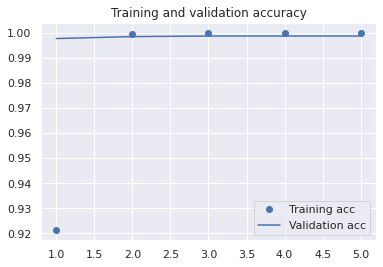

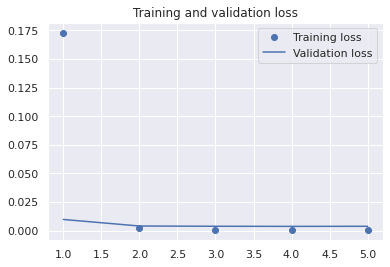

In [28]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [29]:
predicted_value = model.predict(X_test)
accuracy_value = roc_auc_score(y_test, predicted_value)
print(accuracy_value)

0.9999933834305481


<AxesSubplot:>

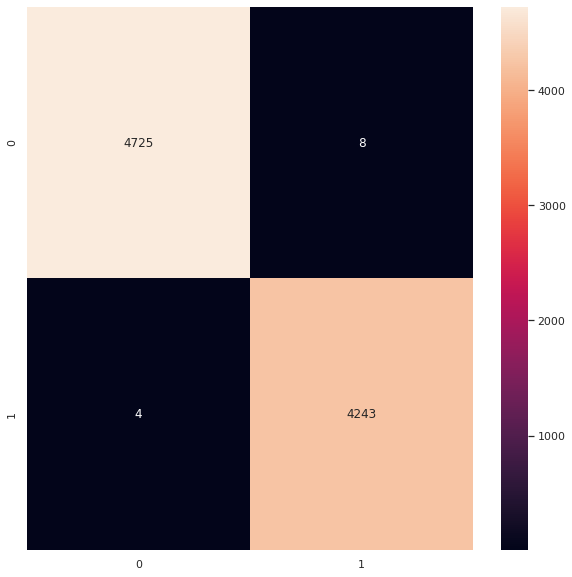

In [30]:
prediction = []
for i in range(len(predicted_value)):
    if predicted_value[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True,fmt='g')

In [31]:
model_2 = Sequential()
model_2.add(layers.Embedding(vocab_size, embedding_dim, input_length=max_length))
model_2.add(layers.Conv1D(32, 5, activation='relu'))
model_2.add(layers.MaxPooling1D(3))
model_2.add(layers.Conv1D(32, 5, activation='relu'))
model_2.add(layers.LSTM(64))
model_2.add(layers.Dense(1,activation='sigmoid'))
model_2.summary()
model_2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10000, 16)         2363344   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 9996, 32)          2592      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 3332, 32)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 3328, 32)          5152      
_________________________________________________________________
lstm (LSTM)                  (None, 64)                24832     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 2,395,985
Trainable params: 2,395,985
Non-trainable params: 0
____________________________________________

In [32]:
history_2 = model_2.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test),batch_size=128)

Epoch 1/5
281/281 [==============================] - 70s 239ms/step - loss: 0.3043 - acc: 0.8417 - val_loss: 0.0344 - val_acc: 0.9883
Epoch 2/5
281/281 [==============================] - 66s 236ms/step - loss: 0.0055 - acc: 0.9987 - val_loss: 0.0266 - val_acc: 0.9920
Epoch 3/5
281/281 [==============================] - 66s 233ms/step - loss: 0.0034 - acc: 0.9989 - val_loss: 0.0198 - val_acc: 0.9950
Epoch 4/5
281/281 [==============================] - 66s 234ms/step - loss: 8.5517e-04 - acc: 0.9998 - val_loss: 0.0171 - val_acc: 0.9963
Epoch 5/5
281/281 [==============================] - 65s 233ms/step - loss: 1.5104e-04 - acc: 1.0000 - val_loss: 0.0180 - val_acc: 0.9965


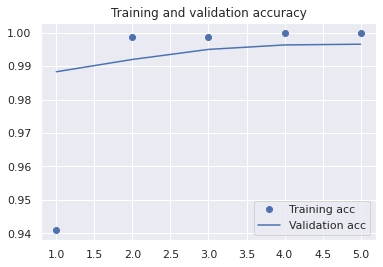

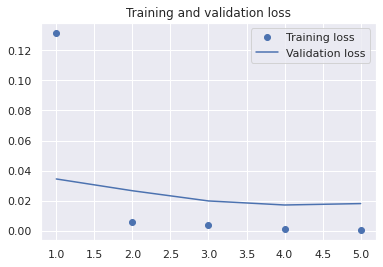

In [33]:
acc = history_2.history['acc']
val_acc = history_2.history['val_acc']
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [34]:
predicted_value = model_2.predict(X_test)
accuracy_value = roc_auc_score(y_test, predicted_value)
print(accuracy_value)

0.9997237955368604


<AxesSubplot:>

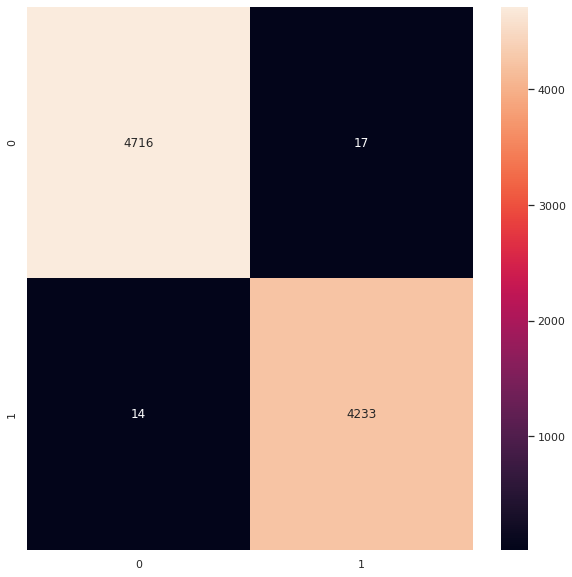

In [35]:
prediction = []
for i in range(len(predicted_value)):
    if predicted_value[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True,fmt='g')